# Scrapping con BS4

En este notebook realizo Scrapping basado en el urso de Web Scrapping de Python, utilizaré el periodico Colombiano EL TIEMPO para hacer mi propia version de Scrapping

#### Solicitudes de páginas web
Para realizar las peticiones a páginas web haremos uso de la librería request de Python

In [1]:
import requests

In [2]:
from IPython.display import Image

In [3]:
url = 'https://www.eltiempo.com/'

In [4]:
response = requests.get(url)

In [5]:
response.status_code

200

##### Status 200 code = Request ejecutado con éxito

In [6]:
#response.text
#Imprimimos como texto el response obtenido

In [7]:
#response.content
#Para casos donde obtenemos archivos multimedia

In [8]:
response.headers
#Encabezado de la página web

{'Server': 'nginx', 'Content-Type': 'text/html; charset=UTF-8', 'X-Server': 'fet03', 'Strict-Transport-Security': 'max-age=15768000; includeSubDomains, max-age=157680000', 'x-url': '/', 'x-frame-options': 'sameorigin', 'X-Cacheable': 'YES', 'X-Varnish': '946789228 947112305', 'X-sc': 'fetx3', 'X-CDN': 'Imperva', 'Content-Encoding': 'gzip', 'X-Iinfo': '14-42648906-42662644 PNYN RT(1628265781149 134501) q(0 0 0 0) r(1 1) U5', 'X-Akamai-Transformed': '9 - 0 pmb=mRUM,1', 'Cache-Control': 'max-age=120', 'Expires': 'Fri, 06 Aug 2021 16:09:35 GMT', 'Date': 'Fri, 06 Aug 2021 16:07:35 GMT', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive, Transfer-Encoding', 'Vary': 'Accept-Encoding', 'Server-Timing': 'cdn-cache; desc=HIT, edge; dur=1', 'version': 'desktop'}

In [9]:
#Encabezado de NUESTRA solicitud:
response.request.headers

{'User-Agent': 'python-requests/2.25.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

###### Observemos como el servidor encuentra que se realizo una solicitud usando el software de python, este user-agent en algunos casos debe ser cambiado para acceder a ciertas wb

In [10]:
#Repaso de nuestro método GET:
response.request.method

'GET'

In [11]:
#Confirmamos la URL solicitada con:
response.request.url

'https://www.eltiempo.com/'

### Parseando HTML con BeatifulSoup

In [12]:
from bs4 import BeautifulSoup

In [13]:
# Parseamos el codigo HTML
s = BeautifulSoup(response.text, 'lxml')

In [14]:
type(s)

bs4.BeautifulSoup

In [15]:
#Mejoramos la presentación del texto html con prettify()
#print(s.prettify())

### Revisando estructura de la página EL TIEMPO.

Como podemos observar, la barra de navegacion de secciones está en el div identificado con class = 'default-menu'

In [16]:
# Obtener encabezado de la página:
#s.find('ul') #De esta forma solo retorna el primer ul
s.find('ul', attrs={'class' : 'default-menu'})

<ul class="default-menu">
<li class="opinion first" itemprop="name">
<a href="/opinion" itemprop="url">Opinión</a>
</li>
<li class="colombia" itemprop="name">
<a href="/colombia" itemprop="url">Colombia</a>
</li>
<li class="bogota" itemprop="name">
<a href="/bogota" itemprop="url">Bogotá</a>
</li>
<li class="mundo" itemprop="name">
<a href="/mundo" itemprop="url">Internacional</a>
</li>
<li class="politica" itemprop="name">
<a href="/politica" itemprop="url">Política</a>
</li>
<li class="justicia" itemprop="name">
<a href="/justicia" itemprop="url">Justicia</a>
</li>
<li class="economia" itemprop="name">
<a href="/economia" itemprop="url">Economía</a>
</li>
<li class="deportes" itemprop="name">
<a href="/deportes" itemprop="url">Deportes</a>
</li>
<li class="cultura" itemprop="name">
<a href="/cultura" itemprop="url">Cultura</a>
</li>
<li class="tecnosfera" itemprop="name">
<a href="/tecnosfera" itemprop="url">Tecnología</a>
</li>
<li class="vida" itemprop="name">
<a href="/vida" itemp

Sin embargo, realmente lo que nos importa es el elemento li (list item) contenido en el tag ul, para ello usamos:

In [17]:
secciones = s.find('ul', attrs={'class' : 'default-menu'}).find_all('li')
#secciones

### Hora de extraer la información contenida en los tag! , nuestro objetivo los href

In [18]:
seccion = secciones[0]

In [19]:
seccion

<li class="opinion first" itemprop="name">
<a href="/opinion" itemprop="url">Opinión</a>
</li>

In [20]:
#Entrar al tag a

In [21]:
#Método 1
print(seccion.find('a'))

#Método 2
print(seccion.a)

<a href="/opinion" itemprop="url">Opinión</a>
<a href="/opinion" itemprop="url">Opinión</a>


In [22]:
#Objetivo: Obtener href y texto
print("Texto: ", seccion.a.get_text())
print("URL: ", seccion.a.get('href'))

Texto:  Opinión
URL:  /opinion


##### Este es un caso particular, podemos obtener exactamente el link parseando con la URL

In [23]:
print("URL: ", url+seccion.a.get('href')[1:])

URL:  https://www.eltiempo.com/opinion


### Obtener todos los links desde secciones

Vamos a realizar la obtención de todos los links mediante un list_comprehension

Adicional, recordando la particularidad vista anteriormente, creo una función para añadir la URL al href

In [24]:
def add_url(url: str,href: str)-> str:
    return url+href[1:]

In [25]:
link_secciones = [add_url(url, seccion.a.get('href')) for seccion in secciones]
link_secciones

['https://www.eltiempo.com/opinion',
 'https://www.eltiempo.com/colombia',
 'https://www.eltiempo.com/bogota',
 'https://www.eltiempo.com/mundo',
 'https://www.eltiempo.com/politica',
 'https://www.eltiempo.com/justicia',
 'https://www.eltiempo.com/economia',
 'https://www.eltiempo.com/deportes',
 'https://www.eltiempo.com/cultura',
 'https://www.eltiempo.com/tecnosfera',
 'https://www.eltiempo.com/vida',
 'https://www.eltiempo.com/salud',
 'https://www.eltiempo.com/unidad-investigativa',
 'https://www.eltiempo.com/eltiempoplay']

In [26]:
texto_secciones = [seccion.a.get_text() for seccion in secciones]
texto_secciones

['Opinión',
 'Colombia',
 'Bogotá',
 'Internacional',
 'Política',
 'Justicia',
 'Economía',
 'Deportes',
 'Cultura',
 'Tecnología',
 'Vida',
 'Salud',
 'Unidad Investigativa',
 'El Tiempo Play']

### Mostrando nuestro Scrappeo :D

In [27]:
for idx,texto in enumerate(texto_secciones):
    print(f"Sección N° {idx}. {texto:>3}, accede a ella mediante el link: {link_secciones[idx]:>}\n")

Sección N° 0. Opinión, accede a ella mediante el link: https://www.eltiempo.com/opinion

Sección N° 1. Colombia, accede a ella mediante el link: https://www.eltiempo.com/colombia

Sección N° 2. Bogotá, accede a ella mediante el link: https://www.eltiempo.com/bogota

Sección N° 3. Internacional, accede a ella mediante el link: https://www.eltiempo.com/mundo

Sección N° 4. Política, accede a ella mediante el link: https://www.eltiempo.com/politica

Sección N° 5. Justicia, accede a ella mediante el link: https://www.eltiempo.com/justicia

Sección N° 6. Economía, accede a ella mediante el link: https://www.eltiempo.com/economia

Sección N° 7. Deportes, accede a ella mediante el link: https://www.eltiempo.com/deportes

Sección N° 8. Cultura, accede a ella mediante el link: https://www.eltiempo.com/cultura

Sección N° 9. Tecnología, accede a ella mediante el link: https://www.eltiempo.com/tecnosfera

Sección N° 10. Vida, accede a ella mediante el link: https://www.eltiempo.com/vida

Sección 

## Ya podemos Scrappear las secciones a partir de los links obtenidos

In [28]:
sec = requests.get(link_secciones[0]) #Obtenemos la pagina de Opinión

In [29]:
sec.status_code #Verificamos que todo está correcto

200

In [30]:
s_seccion = BeautifulSoup(sec.text, 'lxml')

In [31]:
#print(s_seccion.prettify())

In [32]:
#columnas = s_seccion.find('div', attrs={'class': 'columnistas-container'}).find('div', attrs = {'class':'opinion-author-articles'})
columnas = s_seccion.find('div', attrs={'id' : 'ls-184-b14'}).find_all('article')
#columnas

In [33]:
scrapping_opinion_columns = {
    'titulos' : [columna.find('a', attrs = {'class': 'title page-link'}).get_text() for columna in columnas],
    'autores' : [columna.find('a', attrs = {'class': 'author-name page-link'}).get_text() for columna in columnas],
    'links' : [add_url(url,columna.find('a', attrs = {'class': 'title page-link'}).get('href')) for columna in columnas]
}

In [34]:
print("*"*100,"\nSíntesis de Scrapping realizado a blogs en la sección Opinión\n","*"*100,"\n\n")

for idx,titulo in enumerate(scrapping_opinion_columns['titulos']):
    print(f"Columna de opinión N°{idx+1}. {titulo}.\nAutor: {scrapping_opinion_columns['autores'][idx]}.\nLink: {scrapping_opinion_columns['links'][idx]}\n")

**************************************************************************************************** 
Síntesis de Scrapping realizado a blogs en la sección Opinión
 **************************************************************************************************** 


Columna de opinión N°1. Señoras y señores.
Autor: Juan Esteban Constaín.
Link: https://www.eltiempo.com/opinion/columnistas/juan-esteban-constain/senoras-y-senores-columna-de-juan-esteban-constain-608393

Columna de opinión N°2. ¿Estado social de derecho?.
Autor: Pedro Medellin.
Link: https://www.eltiempo.com/opinion/columnistas/pedro-medellin/estado-social-de-derecho-columna-de-pedro-medellin-608391

Columna de opinión N°3. Preguntas para la Conferencia Episcopal.
Autor: Claudia Palacios.
Link: https://www.eltiempo.com/opinion/columnistas/claudia-palacios/preguntas-para-la-conferencia-episcopal-columna-de-claudia-palacios-608389

Columna de opinión N°4. La lágrima fácil.
Autor: Sergio Ramírez.
Link: https://www.eltiempo.

## Síntesis de Scrapping de la sección de opinión (COLUMNAS)

In [35]:
blogs = s_seccion.find('div', attrs={'class': 'opinion-board opinion-blogs-board'}).find_all('article')
#blogs
#Blogs capturados

In [36]:
scrapping_blogs = {
    'titulos' : [blog.find('h3', attrs = {'class': 'title-container'}).get_text()[1:] for blog in blogs],
    'autores' : [blog.find('span', attrs = {'class' : 'author-name'}).get_text() for blog in blogs],
    'links' : [blog.find('a', attrs = {'class' : 'title page-link'}).get('href') for blog in blogs]
}

## Síntesis de Scrapping de la sección de opinión (BLOGS)

In [37]:
print("*"*100,"\nSíntesis de Scrapping realizado a blogs en la sección Opinión\n","*"*100,"\n\n")

for idx,titulo in enumerate(scrapping_blogs['titulos']):
    print(f"Columna de opinión N°{idx+1}. {titulo}.\nAutor: {scrapping_blogs['autores'][idx]}.\nLink: {scrapping_blogs['links'][idx]}\n")

**************************************************************************************************** 
Síntesis de Scrapping realizado a blogs en la sección Opinión
 **************************************************************************************************** 


Columna de opinión N°1. [PODCAST] felicidad Organizacional #125.
Autor: Santiago Ríos.
Link: https://blogs.eltiempo.com/mil-palabras/2021/07/27/podcast-felicidad-organizacional-125/

Columna de opinión N°2. La bandera es una sola y es de todos los colombianos.
Autor: Fabio Cuello.
Link: https://blogs.eltiempo.com/el-observador-pensante/2021/07/27/la-bandera-es-una-sola-y-es-de-todos-los-colombianos/

Columna de opinión N°3. La inevitable victoria de los talibanes en Afganistán.
Autor: Mauricio Jaramillo Jassir.
Link: https://blogs.eltiempo.com/geopolitica-poder-y-democracia/2021/07/27/la-inevitable-victoria-de-los-talibanes-en-afganistan/

Columna de opinión N°4. Marketing de las abuelas.
Autor: Fabián Salazar.
Link: http

In [38]:
url_columna = scrapping_opinion_columns['links'][0]
url_columna

'https://www.eltiempo.com/opinion/columnistas/juan-esteban-constain/senoras-y-senores-columna-de-juan-esteban-constain-608393'

In [39]:
try:
    response_columna = requests.get(url_columna)
    if response_columna.status_code == 200:
        soup_columna = BeautifulSoup(response_columna.text, 'lxml')
        encabezado = soup_columna.find('div', attrs = {'class':'intro-content'})
        
        #Info Columna:
        titulo_columna = encabezado.h1.get_text()
        epigrafo_columna = encabezado.p.get_text()
        fecha_publicacion = soup_columna.find('div', attrs = {'class':'fecha-publicacion-bk'}).span.get_text()[1:-1]
        
        #Info autor:
        autor = encabezado.find('a', attrs = {'class' : 'autor-name'})
        nombre_autor = encabezado.find('div', attrs = {'class' : 'author-details'}).find('a', attrs = {'class' : 'author-name'}).get_text()
        twitter_autor = encabezado.find('div', attrs = {'class' : 'author-details'}).find('a', attrs = {'class' : 'author-twitter'}).get('href')
        foto_autor = add_url(url, soup_columna.find('div', attrs = {'class': 'author-image-container'}).img.get('data-original'))
        
        
        print(f'Título columna: {titulo_columna}')
        print(f'Publicada el: {fecha_publicacion}')
        print(f'Epigrafo:\n{epigrafo_columna}\n')
        print(f'Autor: {nombre_autor}')
        print(f'Twitter: {twitter_autor}')
        print('Foto:')
        
        
except Exception as e:
    print('Error: ', e, '\n')

Título columna: Señoras y señores
Publicada el: 04 de agosto 2021 , 08:03 p. m.
Epigrafo:
Esa es la edad de quiebre, sin duda, los 40 años. Ese día dejamos de ser jóvenes para siempre.

Autor: Juan Esteban Constaín
Twitter: https://twitter.com/Aulogelio
Foto:


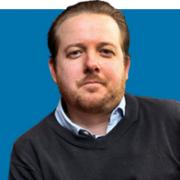

In [40]:
Image(foto_autor)

# Unificando el Scrapper en una función única:

In [41]:
def obtener_datos_columna(soup_columna):
    scrapping = {}
    encabezado = soup_columna.find('div', attrs = {'class':'intro-content'})
        
    #Info Columna:
    #Extraccion titulo
    titulo_encabezado = encabezado.h1
    if titulo_encabezado:
        scrapping['titulo_columna'] = titulo_encabezado.get_text()
    else:
        scrapping['titulo_columna'] = None
    
    #Extracción epigrafo
    epigrafo_columna = encabezado.p
    if epigrafo_columna:
        scrapping['epigrafo_columna'] = epigrafo_columna.get_text()
    else:
        scrapping['epigrafo_columna'] = None
    
    #Extracción fecha publicación
    fecha_publicacion = soup_columna.find('div', attrs = {'class':'fecha-publicacion-bk'}).span
    if fecha_publicacion:
        scrapping['fecha_publicacion'] = fecha_publicacion.get_text()[1:-1]
    else:
        scrapping['fecha_publicacion'] = None
        
    #Info autor:
        nombre_autor = encabezado.find('div', attrs = {'class' : 'author-details'}).find('a', attrs = {'class' : 'author-name'}).get_text()
        twitter_autor = encabezado.find('div', attrs = {'class' : 'author-details'}).find('a', attrs = {'class' : 'author-twitter'}).get('href')
        foto_autor = add_url(url, soup_columna.find('div', attrs = {'class': 'author-image-container'}).img.get('data-original'))
        
    #Extraer info autor:
    
    info_autor = encabezado.find('div', attrs = {'class' : 'author-details'})
    if info_autor:
        nombre_autor = info_autor.find('a', attrs = {'class' : 'author-name'})
        twitter_autor = info_autor.find('a', attrs = {'class' : 'author-twitter'})
        if nombre_autor:
            scrapping['nombre_autor'] = nombre_autor.get_text()
        else:
            scrapping['nombre_autor'] = None
        
        if twitter_autor:
            scrapping['twitter_autor'] = twitter_autor.get_text()
        else:
            scrapping['twitter_autor'] = None
            
    #Extraer foto autor:
    foto_autor = soup_columna.find('div', attrs = {'class': 'author-image-container'}).img
    if foto_autor:
        scrapping['foto_autor'] = add_url(url, foto_autor.get('data-original'))
    else:
        scrapping['foto_autor'] = None
        
    return scrapping

In [42]:
def scrape_columna(url):
    try:
        columna = requests.get(url)
    except Exception as e:
        print(f'Error Scrapping URL: {url}')
        print(e)
        return None
    if columna.status_code != 200:
        print(f'Error obteniendo columna {url}')
        print(f'Status code = {columna.status_code}')
        return None
    s_columna = BeautifulSoup(columna.text, 'lxml')
    scrape = obtener_datos_columna(s_columna)
    scrape['url'] = url
    return scrape

In [43]:
scrape_columna(url_columna)

{'titulo_columna': 'Señoras y señores',
 'epigrafo_columna': 'Esa es la edad de quiebre, sin duda, los 40 años. Ese día dejamos de ser jóvenes para siempre.',
 'fecha_publicacion': '04 de agosto 2021 , 08:03 p. m.',
 'nombre_autor': 'Juan Esteban Constaín',
 'twitter_autor': '@Aulogelio',
 'foto_autor': 'https://www.eltiempo.com/files/image_180_180/uploads/2021/04/07/606e452229735.jpeg',
 'url': 'https://www.eltiempo.com/opinion/columnistas/juan-esteban-constain/senoras-y-senores-columna-de-juan-esteban-constain-608393'}

### Reto: Scrapping a los links de las columnas de opinion

In [44]:
scrapping_blogs['links']

['https://blogs.eltiempo.com/mil-palabras/2021/07/27/podcast-felicidad-organizacional-125/',
 'https://blogs.eltiempo.com/el-observador-pensante/2021/07/27/la-bandera-es-una-sola-y-es-de-todos-los-colombianos/',
 'https://blogs.eltiempo.com/geopolitica-poder-y-democracia/2021/07/27/la-inevitable-victoria-de-los-talibanes-en-afganistan/',
 'https://blogs.eltiempo.com/dialogos-espirituales/2021/07/27/marketing-de-las-abuelas/',
 'https://blogs.eltiempo.com/para-donde-va/2021/07/27/la-fuerza-del-humor/',
 'https://blogs.eltiempo.com/suave-y-profundo/2021/07/27/explosion-de-democracia/',
 'https://blogs.eltiempo.com/digital-jumper/2021/07/27/hacia-la-segunda-independencia/',
 'https://blogs.eltiempo.com/palabreando/2021/07/27/consejos-para-contratar-el-mejor-seguro-de-auto/',
 'https://blogs.eltiempo.com/historiarte/2021/07/27/el-20-de-julio-y-otras-medias-verdades/']

In [45]:
data = []
lista = scrapping_opinion_columns['links']
for idx, link in enumerate(scrapping_opinion_columns['links']):
    try:
        r = requests.get(link)
        if r.status_code == 200:
            print(f'Scrapping la columna de opinion {idx+1}/{len(lista)}')
            data.append(scrape_columna(link))
    except Exception as e:
        print(f'Error scrapping: {e}')

Scrapping la columna de opinion 1/7
Scrapping la columna de opinion 2/7
Scrapping la columna de opinion 3/7
Scrapping la columna de opinion 4/7
Scrapping la columna de opinion 5/7
Scrapping la columna de opinion 6/7
Scrapping la columna de opinion 7/7


### Finalizamos generando un dataframe con la información extraida

In [46]:
import pandas as pd

In [47]:
df = pd.DataFrame(data)

In [48]:
df

,titulo_columna,epigrafo_columna,fecha_publicacion,nombre_autor,twitter_autor,foto_autor,url
0,Señoras y señores,"Esa es la edad de quiebre, sin duda, los 40 añ...","04 de agosto 2021 , 08:03 p. m.",Juan Esteban Constaín,@Aulogelio,https://www.eltiempo.com/files/image_180_180/u...,https://www.eltiempo.com/opinion/columnistas/j...
1,¿Estado social de derecho?,Colombia no es un país que se caracterice por ...,"04 de agosto 2021 , 08:03 p. m.",Pedro Medellin,None,https://www.eltiempo.com/files/image_180_180/u...,https://www.eltiempo.com/opinion/columnistas/p...
2,Preguntas para la Conferencia Episcopal,¿La negación de la autonomía como poder sobera...,"04 de agosto 2021 , 08:00 p. m.",Claudia Palacios,@claudiapalacios,https://www.eltiempo.com/files/image_180_180/u...,https://www.eltiempo.com/opinion/columnistas/c...
3,La lágrima fácil,"Cien años de soledad no tiene, de verdad, como...","04 de agosto 2021 , 08:00 p. m.",Sergio Ramírez,@sergioramirezm,https://www.eltiempo.com/files/image_180_180/u...,https://www.eltiempo.com/opinion/columnistas/s...
4,Construir vivienda,Tenemos certeza de que avanzaremos hacia la co...,"04 de agosto 2021 , 08:00 p. m.",Sandra Forero Ramirez,None,https://www.eltiempo.com/files/image_180_180/u...,https://www.eltiempo.com/opinion/columnistas/s...
5,El baile de los que no sobran,"Debemos escuchar a los jóvenes, respetar sus o...","04 de agosto 2021 , 08:00 p. m.",María A. García de la Torre,@Caidadelatorre,https://www.eltiempo.com/files/image_180_180/u...,https://www.eltiempo.com/opinion/columnistas/m...
6,Impopular opinión,"Si bien es cierto que no puedo negar su logro,...","04 de agosto 2021 , 08:00 p. m.",Elly Hernández,None,https://www.eltiempo.com/files/image_180_180/u...,https://www.eltiempo.com/opinion/columnistas/e...


In [49]:
from datetime import datetime

In [50]:
df.to_csv('./data/Columnas_opinion_ELTIEMPO_'+datetime.today().strftime("%b_%d_%Y"+".csv"))